## Name : Ashwin Chafale
## Github username : chafale
## USC ID : 1990624801

### DSCI-552 HW-1

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sb
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load data from arff file
data1 = arff.loadarff('../../data/vertebral_column_data/column_2C_weka.arff')
df1 = pd.DataFrame(data1[0])

(b) Pre-Processing and Exploratory data analysis:

In [3]:
# Data Preprocessing
# converting class labels to binary values
binary_class = []
for class_values in df1['class']:
    if class_values == b'Normal':
        binary_class.append(0)
    else:
        binary_class.append(1)
        
df1['class'] = binary_class

(b) i. Make scatter plots of the independent variables in the dataset. Use color to show Classes 0 and 1.

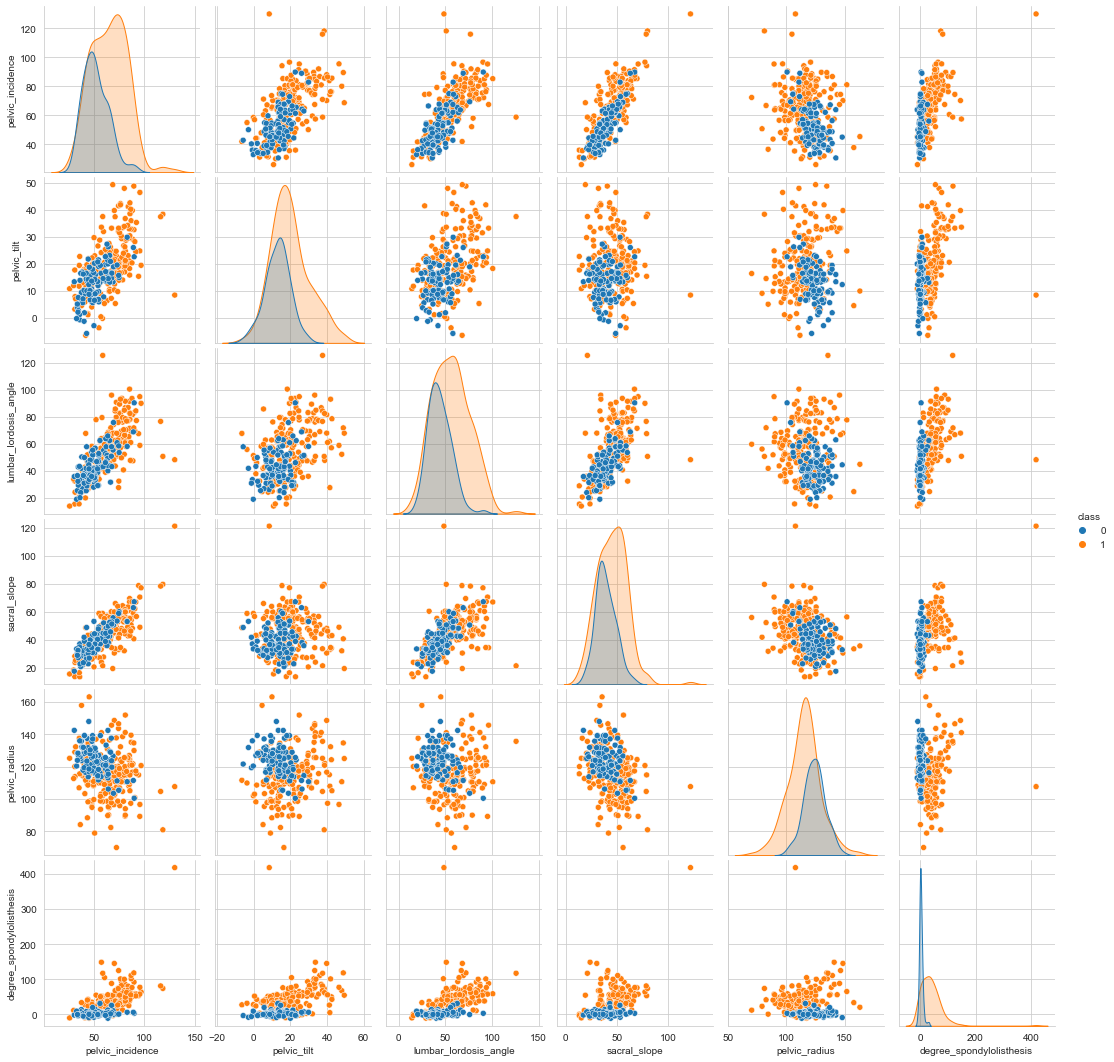

In [4]:
sb.set_style("whitegrid")
sb.pairplot(df1, hue="class")
plt.show()

(b) ii. Make boxplot for each of the independent variables. Use color to show Classes 0 and 1

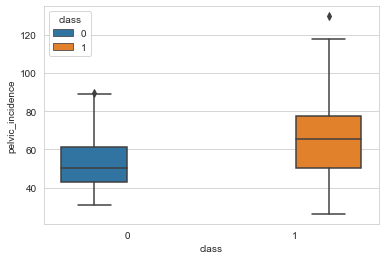

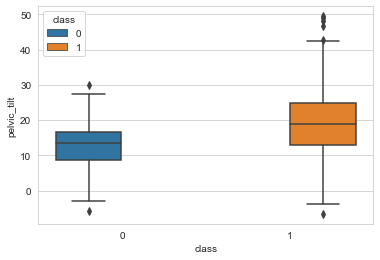

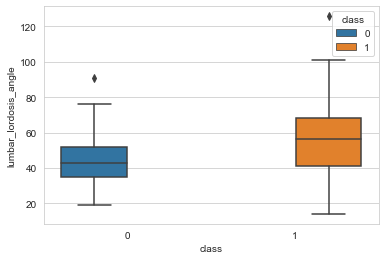

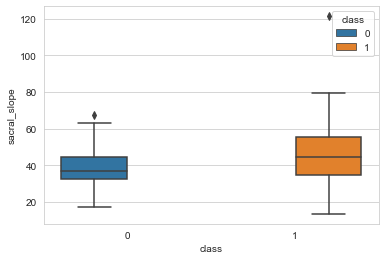

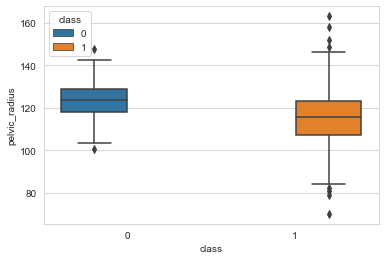

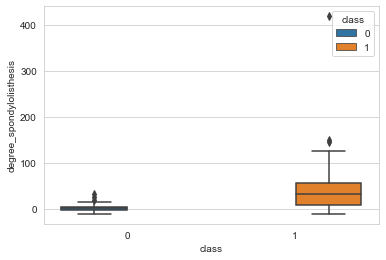

In [5]:
# pelvic_incidence
sb.boxplot(x='class', y='pelvic_incidence', data=df1, hue="class")
plt.show()

# pelvic_tilt
sb.boxplot(x='class', y='pelvic_tilt', data=df1, hue="class")
plt.show()

# lumbar_lordosis_angle
sb.boxplot(x='class', y='lumbar_lordosis_angle', data=df1, hue="class")
plt.show()

# sacral_slope
sb.boxplot(x='class', y='sacral_slope', data=df1, hue="class")
plt.show()

# pelvic_radius
sb.boxplot(x='class', y='pelvic_radius', data=df1, hue="class")
plt.show()

# degree_spondylolisthesis
sb.boxplot(x='class', y='degree_spondylolisthesis', data=df1, hue="class")
plt.show()

(b) iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [6]:
group = df1.groupby('class')
class_0_train = group.get_group(0)[:70]
class_0_test = group.get_group(0)[70:]
class_1_train = group.get_group(1)[:140]
class_1_test = group.get_group(1)[140:]

In [7]:
# training dataset
df_train1 = class_1_train[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
df_train2 = class_0_train[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]

X_train = pd.concat([df_train1, df_train2])
Y_train = pd.concat([class_1_train['class'], class_0_train['class']])

In [8]:
# test dataset
df_test1 = class_1_test[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
df_test2 = class_0_test[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]

X_test = pd.concat([df_test1, df_test2])
Y_test = pd.concat([class_1_test['class'], class_0_test['class']])

(c) Classification using KNN on Vertebral Column Data Set
    i. Write code for k-nearest neighbors with Euclidean metric

In [9]:
def knnClassifier(k, x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', p=2)
    knn.fit(x_train, y_train)
    # train errors
    train_error = 1 - knn.score(x_train, y_train)
    # test errors
    test_error = 1 - knn.score(x_test, y_test)
    return train_error, test_error

(c) ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for in range (208; 205; . .  . . 7; 4; 1) (in reverse order).

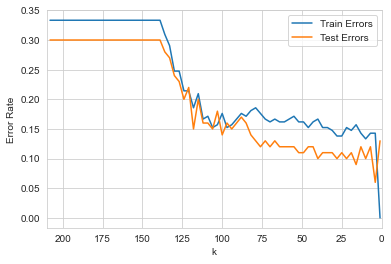

In [10]:
train_error = []
train_err_dict = {}
test_error = []
test_error_dict = {}
for k in range(208,0,-3):
    e1, e2 = knnClassifier(k, X_train, X_test, Y_train, Y_test)
    train_error.append(e1)
    test_error.append(e2)
    train_err_dict[e1] = k
    test_error_dict[e2] = k

# plot the graph in opposite direction
plt.xlim(210,0)
plt.plot(range(208,0,-3), train_error, label='Train Errors')
plt.plot(range(208,0,-3), test_error, label='Test Errors')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.legend()

(c) ii. Which k* is the most suitable k among those values?

In [11]:
test_min_error = min(test_error)
k_value = test_error_dict[test_min_error]
print("Most suitable k* : ", k_value)

Most suitable k* :  4


(c) ii. Calculate the confusion matrix when k = k*

In [12]:
knn = KNeighborsClassifier(n_neighbors = k_value)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

Confusion_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion matrix : \n")
Confusion_matrix

Confusion matrix : 



array([[25,  5],
       [ 1, 69]])

(c) ii. Calculate true positive rate, true negative rate, precision, and F1-score when k = k*

In [13]:
tn,fp,fn,tp = confusion_matrix(Y_test, y_pred).ravel()
print('True Positive Rate = ', tp/(tp+fn))
print('True Negative Rate = ', tn/(fp+tn))
print('Precision = ', tp/(tp+fp))
F1_score = f1_score(Y_test, y_pred)
print('F1 Score = ', F1_score)

True Positive Rate =  0.9857142857142858
True Negative Rate =  0.8333333333333334
Precision =  0.9324324324324325
F1 Score =  0.9583333333333333


(c) iii. Plot the best test error rate vs N (Learning Curve)

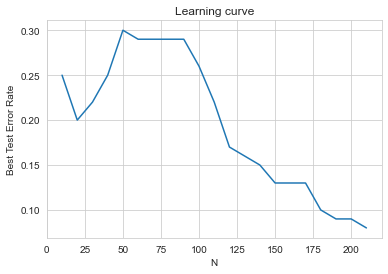

In [14]:
# learning curve
def learningCurve(N, x_train_, x_test, y_train_, y_test):
    Nby3 = math.floor(N/3)

    Xtrain = pd.concat([x_train_[: N - Nby3], x_train_[210 : 210 + Nby3]])
    Ytrain = pd.concat([y_train_[: N - Nby3], y_train_[210 : 210 + Nby3]])

    best_rate = 1
    for i in range(1,N,5):
        train_error, test_error = knnClassifier(i, Xtrain, x_test, Ytrain, y_test)
        if test_error < best_rate:
            best_rate = test_error
    return best_rate
class1_train = group.get_group(1)
class0_train = group.get_group(0)

train_1 = class1_train[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]
train_2 = class0_train[["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]]

X_train_ = pd.concat([train_1, train_2])
Y_train_ = pd.concat([class1_train['class'], class0_train['class']])
best_rate = []
for n in range(10,220,10):
    best_rate.append(learningCurve(n, X_train_, X_test, Y_train_, Y_test))

# Plot learning curve
plt.plot(range(10,220,10), best_rate)
plt.xlabel('N')
plt.ylabel('Best Test Error Rate')
plt.title('Learning curve')
plt.show()

Variants of KNN

In [15]:
def custom_KNN_Model(k, metric, x_train, x_test, y_train, y_test, p=None, metric_params=None, weights='uniform'):
    knn = KNeighborsClassifier(n_neighbors = k, metric = metric, p = p, metric_params = metric_params, weights = weights)
    knn.fit(x_train, y_train)
    test_error = 1 - knn.score(x_test, y_test)
    return test_error

(d) i. Minkowski Distance: A. which becomes Manhattan Distance with p = 1

Manhattan Distance:
Best test error =  0.10999999999999999
Best k =  1


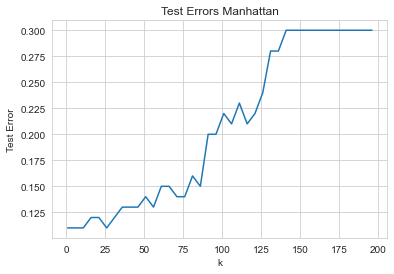

In [16]:
testError_Manhattan = []
best_Manhattan = float("inf")
k_Manhattan = 1
for k in range(1,201,5):
    testError = custom_KNN_Model(k, 'manhattan', X_train, X_test, Y_train, Y_test, p=1)
    testError_Manhattan.append(testError)
    if testError < best_Manhattan:
        best_Manhattan = testError
        k_Manhattan = k

print('Manhattan Distance:')
print('Best test error = ', best_Manhattan)
print('Best k = ', k_Manhattan)

plt.plot(range(1,201,5), testError_Manhattan)
plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Errors Manhattan')
plt.show()

(d) i. Minkowski Distance: B. with log10(p)  in range(0.1; 0.2; 0.3; : : : ; 1) and k = 1 from 1(d)iA

Minkowski Distance:
Best test error =  0.10999999999999999
Best p =  0.7000000000000001


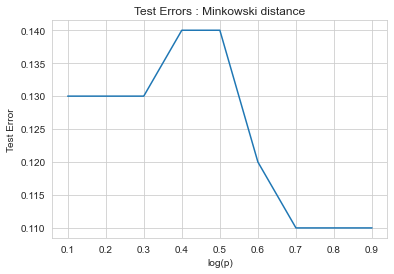

In [17]:
testError_Minkowski = []
best_Minkowski = float("inf")
p_Minkowski = 1
for j in np.arange(0.1,1,0.1):
    p = pow(10,j)
    testError = custom_KNN_Model(1,'minkowski', X_train, X_test, Y_train, Y_test, p=p)
    testError_Minkowski.append(testError)
    if testError < best_Minkowski:
        best_Minkowski = testError
        p_Minkowski = p

print('Minkowski Distance:')
print('Best test error = ', best_Minkowski)
print('Best p = ', np.log10(p_Minkowski))

plt.plot(np.arange(0.1,1,0.1), testError_Minkowski)
plt.xlabel('log(p)')
plt.ylabel('Test Error')
plt.title('Test Errors : Minkowski distance')
plt.show()

(d) i. Minkowski Distance: C. which becomes Chebyshev Distance with p -> infinity

Chebyshev Distance:
Best test error =  0.08
Best k =  16


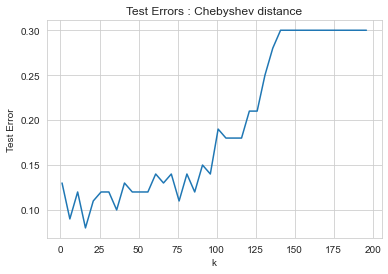

In [18]:
testError_Chebyshev = []
best_Chebyshev = float("inf")
k_Chebyshev = 1
for k in range(1,201,5):
    testError = custom_KNN_Model(k,'chebyshev', X_train, X_test, Y_train, Y_test)
    testError_Chebyshev.append(testError)
    if testError < best_Chebyshev:
        best_Chebyshev = testError
        k_Chebyshev = k

print('Chebyshev Distance:')
print('Best test error = ', round(best_Chebyshev,2))
print('Best k = ', k_Chebyshev)

plt.plot(range(1,201,5), testError_Chebyshev)
plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Errors : Chebyshev distance')
plt.show()

(d) ii. Mahalanobis Distance

Mahalanobis Distance:
Best test error =  0.08
Best k =  6


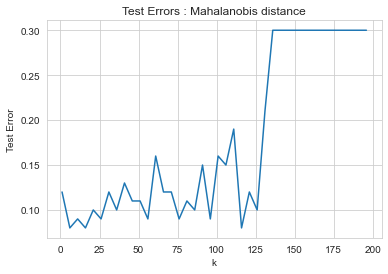

In [19]:
testError_Mahalanobis = []
best_Mahalanobis = float("inf")
k_Mahalanobis = 1
for k in range(1,201,5):
    testError = custom_KNN_Model(k,'mahalanobis', X_train, X_test, Y_train, Y_test, metric_params={'VI':np.cov(X_train.T)})
    testError_Mahalanobis.append(testError)
    if testError < best_Mahalanobis:
        best_Mahalanobis = testError
        k_Mahalanobis = k

print('Mahalanobis Distance:')
print('Best test error = ', round(best_Mahalanobis,2))
print('Best k = ', k_Mahalanobis)

plt.plot(range(1,201,5), testError_Mahalanobis)
plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Errors : Mahalanobis distance')
plt.show()

(e) Use weighted voting with Euclidean distance

Weighted Euclidean Distance:
Best test error =  0.1


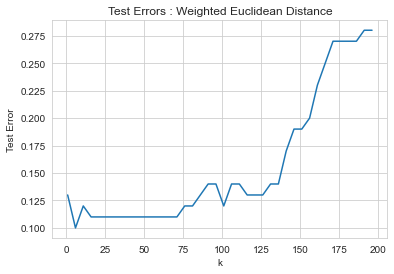

In [20]:
weighted_Euclidean = []
best_weighted_Euclidean = 1
for k in range(1,201,5):
    testError = custom_KNN_Model(k, 'euclidean', X_train, X_test, Y_train, Y_test, weights ='distance')
    weighted_Euclidean.append(testError)
    if testError < best_weighted_Euclidean:
        best_weighted_Euclidean = testError

print('Weighted Euclidean Distance:')
print('Best test error = ', round(best_weighted_Euclidean,2))

plt.plot(range(1,201,5), weighted_Euclidean)
plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Errors : Weighted Euclidean Distance')
plt.show()

(e) Use weighted voting with Manhattan Distance

Weighted Manhattan Distance:
Best test error =  0.1


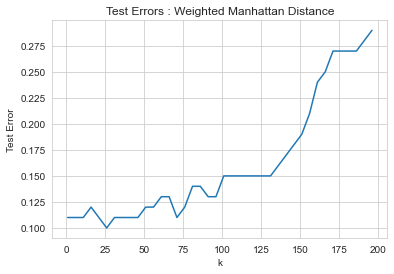

In [21]:
weighted_Manhattan = []
best_weighted_Manhattan = 1

for k in range(1,201,5):
    testError = custom_KNN_Model(k, 'manhattan', X_train, X_test, Y_train, Y_test, weights ='distance')
    weighted_Manhattan.append(testError)
    if testError < best_weighted_Manhattan:
        best_weighted_Manhattan = testError

print('Weighted Manhattan Distance:')
print('Best test error = ', round(best_weighted_Manhattan,2))

plt.plot(range(1,201,5), weighted_Manhattan)
plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Errors : Weighted Manhattan Distance')
plt.show()

(e) Use weighted voting with Chebyshev Distance

Weighted Chebyshev Distance:
Best test error =  0.11


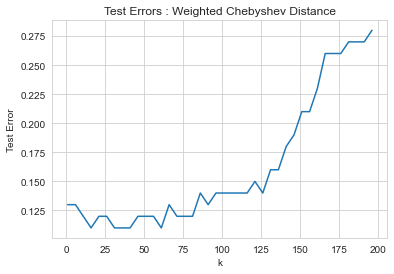

In [22]:
weighted_Chebyshev = []
best_weighted_Chebyshev = 1
for k in range(1,201,5):
    testError = custom_KNN_Model(k,'chebyshev', X_train, X_test, Y_train, Y_test, weights ='distance')
    weighted_Chebyshev.append(testError)
    if testError < best_weighted_Chebyshev:
        best_weighted_Chebyshev = testError

print('Weighted Chebyshev Distance:')
print('Best test error = ', round(best_weighted_Chebyshev,2))

plt.plot(range(1,201,5), weighted_Chebyshev)
plt.xlabel('k')
plt.ylabel('Test Error')
plt.title('Test Errors : Weighted Chebyshev Distance')
plt.show()

(f) What is the lowest training error rate you achieved in this homework?
Answer : The lowest training error = 0 when k = 1